In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv("pop_genres_dataset.csv")
pop.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,my little airport,每次你走的時分,47,183968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,cantopop
1,my little airport,下了兩天雨,44,172343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,cantopop
2,my little airport,詩歌舞街,50,191308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,cantopop
3,my little airport,那陣時不知道,48,148564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,cantopop
4,Eason Chan,無條件,54,228973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,cantopop


## Predicting pop song explicitness

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [4]:
# Only selecting numeric variables
X = pop[["popularity", "duration_ms", "danceability", "energy",
         "key", "loudness", "mode", "speechiness", "acousticness",
         "instrumentalness", "liveness", "valence", "tempo", "time_signature"]]
y = pop["explicit"]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
df = pd.concat([X_train, y_train], axis = 1)
df.corr()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit
popularity,1.000000,0.119770,0.133854,0.019746,0.011389,0.105342,-0.071275,0.068684,0.044592,-0.045519,-0.054945,-0.014605,-0.055654,0.040957,0.014291
duration_ms,0.119770,1.000000,-0.028426,-0.092777,0.006021,-0.111904,-0.020384,-0.112708,0.135789,-0.056019,-0.058741,-0.070367,-0.048555,-0.013938,-0.092259
danceability,0.133854,-0.028426,1.000000,0.054455,0.031049,0.050184,-0.120570,0.131527,-0.116178,-0.060166,-0.129208,0.334176,-0.210335,0.131912,0.129864
energy,0.019746,-0.092777,0.054455,1.000000,0.018415,0.720586,-0.091753,0.226773,-0.708240,0.054256,0.140642,0.463023,0.179279,0.193845,0.034781
key,0.011389,0.006021,0.031049,0.018415,1.000000,0.024051,-0.092927,0.046018,-0.012636,-0.013831,-0.025546,0.027881,0.012591,0.019084,0.018659
loudness,0.105342,-0.111904,0.050184,0.720586,0.024051,1.000000,-0.054929,0.164364,-0.487139,-0.058715,0.043576,0.211999,0.109209,0.146760,0.079670
mode,-0.071275,-0.020384,-0.120570,-0.091753,-0.092927,-0.054929,1.000000,-0.073293,0.077547,0.022493,0.002541,-0.066680,0.024638,-0.013669,-0.016466
speechiness,0.068684,-0.112708,0.131527,0.226773,0.046018,0.164364,-0.073293,1.000000,-0.157578,-0.019572,0.060020,0.138043,0.122292,0.037423,0.151343
acousticness,0.044592,0.135789,-0.116178,-0.708240,-0.012636,-0.487139,0.077547,-0.157578,1.000000,-0.077869,-0.099658,-0.315047,-0.146461,-0.210545,-0.105286
instrumentalness,-0.045519,-0.056019,-0.060166,0.054256,-0.013831,-0.058715,0.022493,-0.019572,-0.077869,1.000000,0.015621,0.001061,0.010143,-0.002642,-0.008930


In the training data, explicitness seems to have low correlations with the predictor variables. As such, Random Forests should be used to investigate non-linear relationships and combinations that can help predict whether or not a song is explicit.

### Cross validation

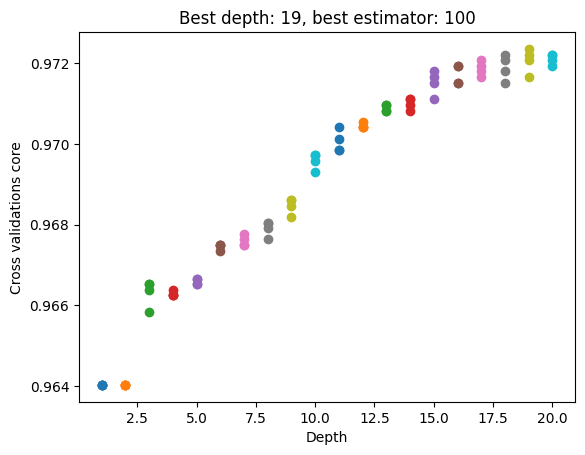

In [6]:
# Getting the best number of estimators and depth
estimators = np.arange(100, 300, 50)
depths = np.arange(1, 21)
best_score = 0
best_depth = 0
best_estimator = 0

fig,ax = plt.subplots(1)
ax.set(xlabel = "Depth", ylabel = "Cross validations core")

for e in estimators:
    for d in depths:
        rf = RandomForestClassifier(n_estimators= 100, max_depth = d)

        # Cross validate with 5 folds
        score = cross_val_score(rf, X_train, y_train, cv = 5, scoring="accuracy").mean()

        if score >= best_score:
            best_score = score
            best_depth = d
            best_estimator = e
        
        ax.scatter(d, score)

ax.set(title = f"Best depth: {best_depth}, best estimator: {best_estimator}")
plt.show()

### Random Forests

In [7]:
rf = RandomForestClassifier(n_estimators= best_estimator, max_depth = best_depth)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Confusion matrix

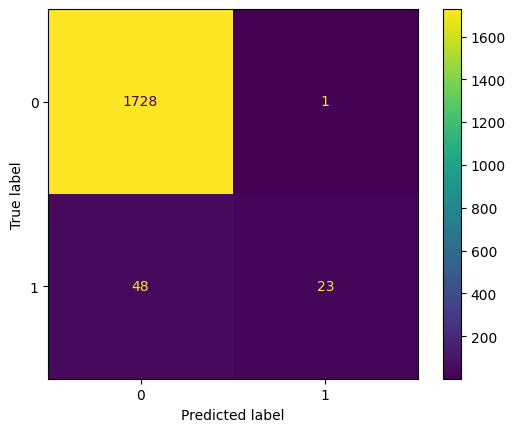

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Performance metrics

In [9]:
print("Prediction accuracy:", round(accuracy_score(y_test, y_pred), 5))
print("Prediction error:", round(1 - accuracy_score(y_test, y_pred), 5))

# To obtain values in matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True positive rate:", round(tp / (tp + fn), 5))
print("True negative rate:", round(tn / (tn + fp), 5))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("F1 score:", round((2 * precision * recall) / (precision + recall), 5))

Prediction accuracy: 0.97278
Prediction error: 0.02722
True positive rate: 0.32394
True negative rate: 0.99942
F1 score: 0.48421


Overall, the model predicts the data well with a prediction accuracy of 97.33%. The model is excellent at identifying non-explicit songs 99.94% of the time but is only able to identify explicit songs 33.8% of the time. This may be due to the fact that there are significantly more non-explicit songs than explicit songs in the data. The F1 score supports the fact that the model is unable to predict explicit songs very well.

### ROC curve

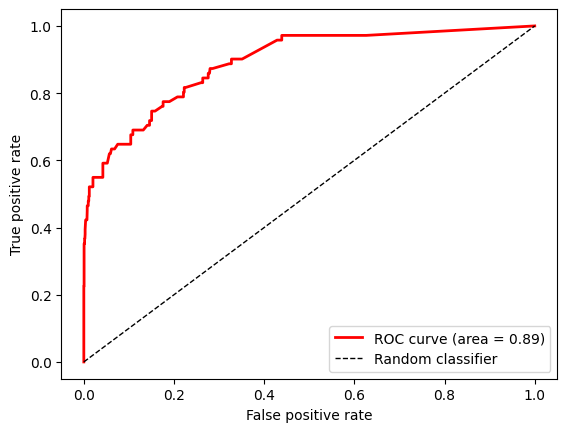

In [10]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color = "red", lw = 2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color = "black", lw = 1, linestyle = "--",
         label = "Random classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.show()

After observing the ROC curve with the AUC being 0.89, the problem may lie in the model's threshold instead of its ability to discern between explicit vs non explicit. Adjusting the threshold may lead to better classification of explicit songs.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_per_fold = cross_val_score(rf, X, y, cv=kf, scoring="roc_auc")
accuracy_per_fold = cross_val_score(rf, X, y, cv=kf, scoring="accuracy")
fold = pd.DataFrame({
    "Fold": np.arange(1, 6),
    "AUC": auc_per_fold,
    "Accuracy": accuracy_per_fold
})

print(fold)

   Fold       AUC  Accuracy
0     1  0.904484  0.972778
1     2  0.886606  0.972222
2     3  0.902769  0.975000
3     4  0.898703  0.975556
4     5  0.893236  0.972778
